In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [5]:
std_0 = torch.load("../../checkpoints/autoencoder-num_latents=16-wikipedia-v2.4.1.0-128/100000.pth")["latent_std"]
std_1 = torch.load("../../checkpoints/autoencoder-num_latents=16-wikipedia-v2.4.1.1-128/100000.pth")["latent_std"]
std_2 = torch.load("../../checkpoints/autoencoder-num_latents=16-wikipedia-v2.4.1.2-128/100000.pth")["latent_std"]
std_3 = torch.load("../../checkpoints/autoencoder-num_latents=16-wikipedia-v2.4.1.3-128/100000.pth")["latent_std"]
std_4 = torch.load("../../checkpoints/autoencoder-num_latents=16-wikipedia-v2.4.1.4-128/100000.pth")["latent_std"]

In [6]:
std_vals_0 = sorted(std_0.flatten().detach().cpu().tolist())
std_vals_1 = sorted(std_1.flatten().detach().cpu().tolist())
std_vals_2 = sorted(std_2.flatten().detach().cpu().tolist())
std_vals_3 = sorted(std_3.flatten().detach().cpu().tolist())
std_vals_4 = sorted(std_4.flatten().detach().cpu().tolist())

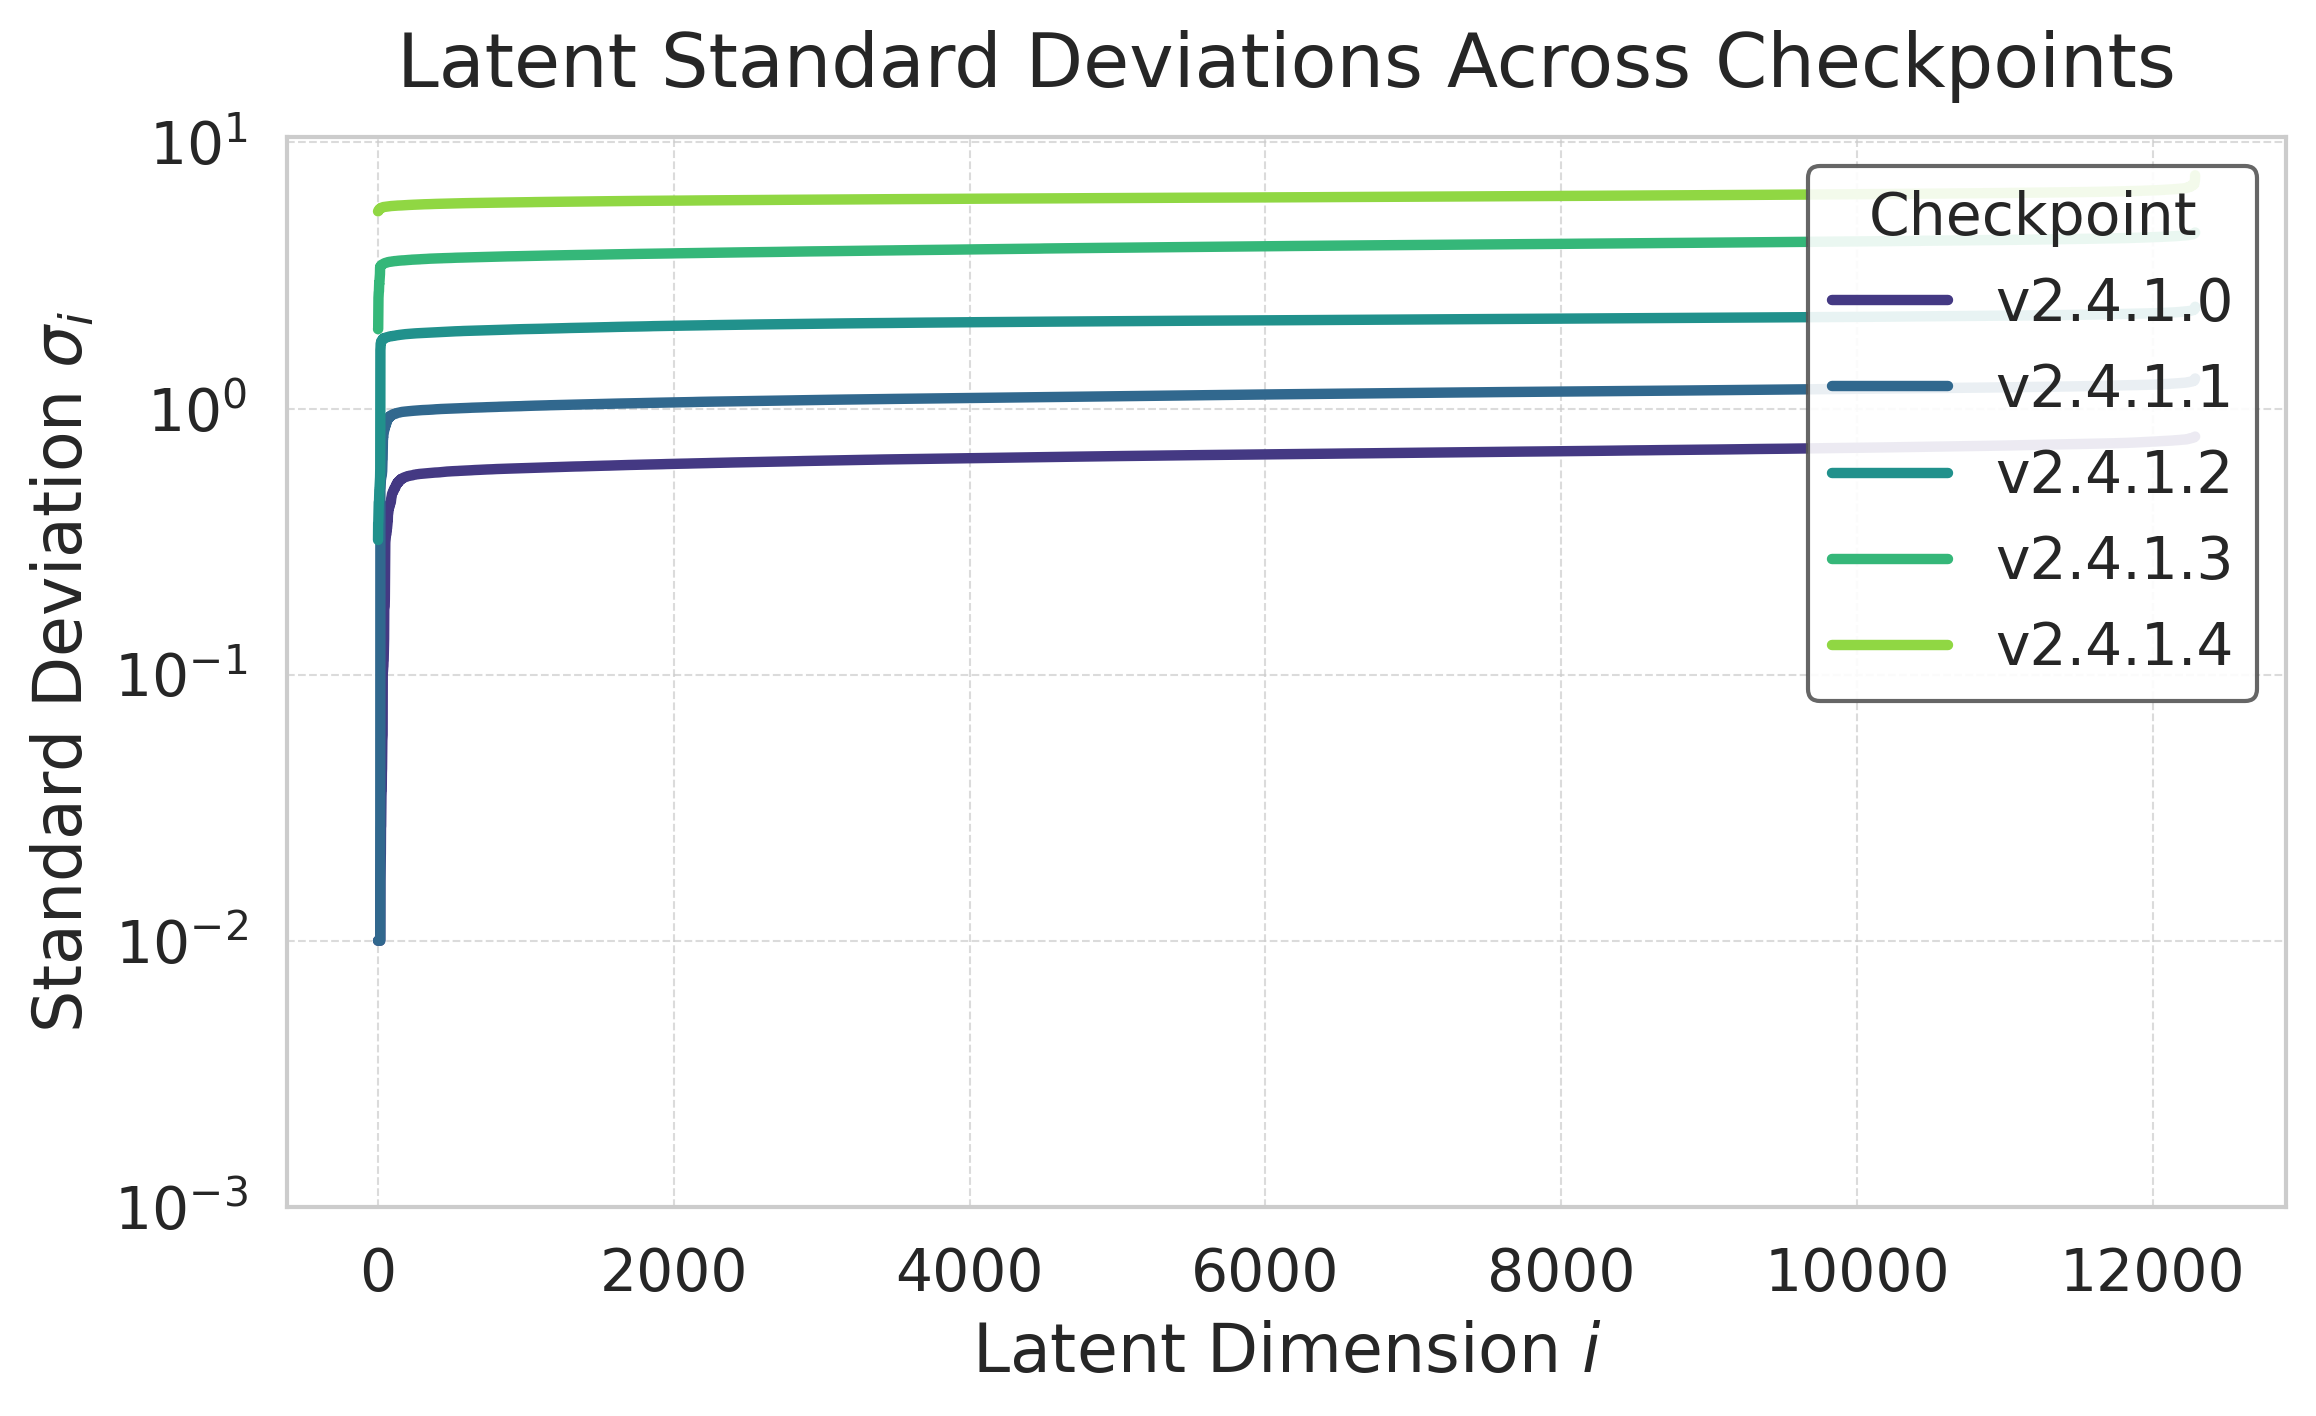

In [8]:
# Cell: Plot the standard deviations per latent dimension (replace previous in[3])

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Publication-quality styling (match plot4)
sns.set_theme(style="whitegrid")
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'axes.linewidth': 1.0,
    'grid.linewidth': 0.5,
    'lines.linewidth': 2.5,
    'figure.dpi': 300,
})

# 2. Prepare data
std_vals_list = [
    sorted(std_0.flatten().cpu().tolist()),
    sorted(std_1.flatten().cpu().tolist()),
    sorted(std_2.flatten().cpu().tolist()),
    sorted(std_3.flatten().cpu().tolist()),
    sorted(std_4.flatten().cpu().tolist()),
]
# human-readable labels for each checkpoint
labels = [
    'v2.4.1.0', 'v2.4.1.1', 'v2.4.1.2',
    'v2.4.1.3', 'v2.4.1.4'
]

# 3. Color palette
palette = sns.color_palette("viridis", len(std_vals_list))

# 4. Plot
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

for vals, lbl, col in zip(std_vals_list, labels, palette):
    ax.plot(
        range(len(vals)), vals,
        label=lbl,
        color=col,
        linestyle='-'
    )

# 5. Axes & scales
ax.set_title("Latent Standard Deviations Across Checkpoints", pad=12)
ax.set_xlabel(r"Latent Dimension $i$")
ax.set_ylabel(r"Standard Deviation $\sigma_i$")
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)      # adjust as needed
ax.grid(which='major', linestyle='--', alpha=0.7)

# 6. Legend
leg = ax.legend(
    title="Checkpoint",
    title_fontsize=14,
    loc="upper right",
    frameon=True
)
# make legend frame a bit lighter
leg.get_frame().set_edgecolor('#555')
leg.get_frame().set_alpha(0.9)

# 7. Final layout & save
plt.tight_layout()
plt.savefig("plot-app-gauss.pdf", dpi=600, bbox_inches='tight')
plt.show()